In [2]:
!pip install wordcloud

   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 151.4/151.4 kB 8.8 MB/s eta 0:00:00


In [15]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from collections import Counter
import re
import os
from wordcloud import WordCloud
import pandas as pd

In [2]:
# Set the working directory
os.chdir(r'C:\Users\Guillaume CAPELLI\Desktop\Ironhack_189\Final_Project')

# Load the data
file_path = r'Dataset\Scraped_df\scraped_df.csv'
data = pd.read_csv(file_path)
data

,username,comment,date,likes
0,@jackjolly789,I'm not from the US but I sure as hell know no...,3 years ago,160
1,@DenverEight,"I remember in Captain Planet, Mati’s power of ...",3 years ago,0
2,@jhartmggc,It’s tragic how this all unfolded. Unfortunate...,3 years ago,0
3,@datofficial6062,"We dont need his ""help to understand what we'r...",3 years ago,289
4,@panthercub10,You know it odd but the more this happens the ...,3 years ago,1
...,...,...,...,...
2233,@claudiabotto3048,Trump,10 months ago,0
2234,@MichelSantana-xg5qi,Trump and your beautiful lie.,5 months ago,0
2235,@slifer0081,As much as I hate trump and love migrants I ha...,2 months ago,0
2236,@george4821,Trump was the rude one here.,3 months ago,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  2233 non-null   object
 1   comment   2217 non-null   object
 2   date      2238 non-null   object
 3   likes     2238 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 70.1+ KB


In [4]:
data['date'].value_counts()

3 years ago      1218
1 year ago        390
2 years ago       150
11 months ago      97
4 years ago        70
1 months ago       52
2 months ago       41
4 months ago       28
6 months ago       26
8 months ago       26
3 months ago       21
5 months ago       21
10 months ago      18
7 months ago       17
9 months ago       14
2 weeks agos       10
5 days agos         8
3 weeks agos        7
7 days agos         5
12 days agos        4
4 days agos         3
9 days agos         3
6 days agos         2
4 weeks agos        1
8 days agos         1
20 hours agos       1
14 hours agos       1
11 days agos        1
2 days agos         1
10 days agos        1
Name: date, dtype: int64

In [5]:
# Define a function to convert relative dates into approximate absolute datetime objects
def approximate_date(relative_date_string, reference_date):
    """
    This function converts a relative date into an approximate absolute date.
    :param relative_date_string: A string indicating the relative date (e.g., '3 years ago').
    :param reference_date: The date to which the relative date refers.
    :return: An approximate absolute datetime object.
    """
    number, time_unit = re.match(r'(\d+)\s(\w+)', relative_date_string).groups()
    number = int(number)
    if 'year' in time_unit:
        return reference_date - timedelta(days=365 * number)
    elif 'month' in time_unit:
        return reference_date - timedelta(days=30 * number)  # Approximate each month as 30 days
    elif 'day' in time_unit:
        return reference_date - timedelta(days=number)
    elif 'hour' in time_unit:
        return reference_date - timedelta(hours=number)
    elif 'minute' in time_unit:
        return reference_date - timedelta(minutes=number)
    else:
        return reference_date

In [6]:
# Assume the reference date is the current date minus the maximum relative date found
# For demonstration, I'll use today's date as the reference date since we do not have the exact date of data collection.
reference_date = datetime.now()

In [7]:
# Apply the date conversion
data['approximate_date'] = data['date'].apply(lambda x: approximate_date(x, reference_date))
data

,username,comment,date,likes,approximate_date
0,@jackjolly789,I'm not from the US but I sure as hell know no...,3 years ago,160,2020-11-12 22:11:51.054854
1,@DenverEight,"I remember in Captain Planet, Mati’s power of ...",3 years ago,0,2020-11-12 22:11:51.054854
2,@jhartmggc,It’s tragic how this all unfolded. Unfortunate...,3 years ago,0,2020-11-12 22:11:51.054854
3,@datofficial6062,"We dont need his ""help to understand what we'r...",3 years ago,289,2020-11-12 22:11:51.054854
4,@panthercub10,You know it odd but the more this happens the ...,3 years ago,1,2020-11-12 22:11:51.054854
...,...,...,...,...,...
2233,@claudiabotto3048,Trump,10 months ago,0,2023-01-16 22:11:51.054854
2234,@MichelSantana-xg5qi,Trump and your beautiful lie.,5 months ago,0,2023-06-15 22:11:51.054854
2235,@slifer0081,As much as I hate trump and love migrants I ha...,2 months ago,0,2023-09-13 22:11:51.054854
2236,@george4821,Trump was the rude one here.,3 months ago,0,2023-08-14 22:11:51.054854


In [8]:
data['approximate_date'].value_counts()

2020-11-12 22:11:51.054854    1218
2022-11-12 22:11:51.054854     390
2021-11-12 22:11:51.054854     150
2022-12-17 22:11:51.054854      97
2019-11-13 22:11:51.054854      70
2023-10-13 22:11:51.054854      52
2023-09-13 22:11:51.054854      41
2023-07-15 22:11:51.054854      28
2023-05-16 22:11:51.054854      26
2023-03-17 22:11:51.054854      26
2023-08-14 22:11:51.054854      21
2023-06-15 22:11:51.054854      21
2023-11-12 22:11:51.054854      18
2023-01-16 22:11:51.054854      18
2023-04-16 22:11:51.054854      17
2023-02-15 22:11:51.054854      14
2023-11-07 22:11:51.054854       8
2023-11-05 22:11:51.054854       5
2023-10-31 22:11:51.054854       4
2023-11-08 22:11:51.054854       3
2023-11-03 22:11:51.054854       3
2023-11-06 22:11:51.054854       2
2023-11-04 22:11:51.054854       1
2023-11-12 02:11:51.054854       1
2023-11-12 08:11:51.054854       1
2023-11-01 22:11:51.054854       1
2023-11-10 22:11:51.054854       1
2023-11-02 22:11:51.054854       1
Name: approximate_da

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

username             5
comment             21
date                 0
likes                0
approximate_date     0
dtype: int64

In [11]:
data['likes'].describe()

count    2238.000000
mean       17.315907
std        76.202450
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max       980.000000
Name: likes, dtype: float64

Text(0, 0.5, 'Frequency')

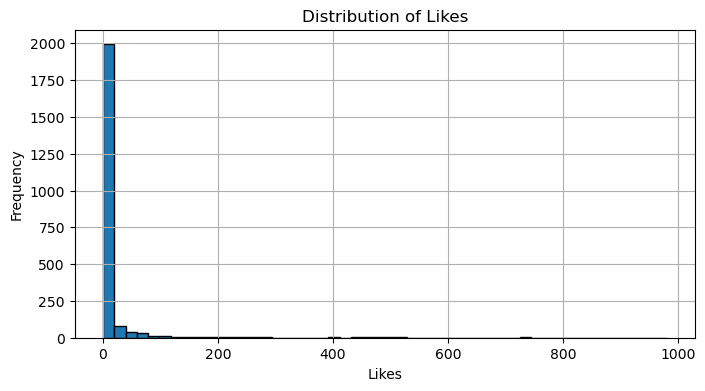

In [12]:
# Plotting the distribution of likes
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
data['likes'].hist(ax=ax, bins=50, edgecolor='black')
ax.set_title('Distribution of Likes')
ax.set_xlabel('Likes')
ax.set_ylabel('Frequency')

In [17]:
data

,username,comment,date,likes,approximate_date
0,@jackjolly789,I'm not from the US but I sure as hell know no...,3 years ago,160,2020-11-12 22:11:51.054854
1,@DenverEight,"I remember in Captain Planet, Mati’s power of ...",3 years ago,0,2020-11-12 22:11:51.054854
2,@jhartmggc,It’s tragic how this all unfolded. Unfortunate...,3 years ago,0,2020-11-12 22:11:51.054854
3,@datofficial6062,"We dont need his ""help to understand what we'r...",3 years ago,289,2020-11-12 22:11:51.054854
4,@panthercub10,You know it odd but the more this happens the ...,3 years ago,1,2020-11-12 22:11:51.054854
...,...,...,...,...,...
2233,@claudiabotto3048,Trump,10 months ago,0,2023-01-16 22:11:51.054854
2234,@MichelSantana-xg5qi,Trump and your beautiful lie.,5 months ago,0,2023-06-15 22:11:51.054854
2235,@slifer0081,As much as I hate trump and love migrants I ha...,2 months ago,0,2023-09-13 22:11:51.054854
2236,@george4821,Trump was the rude one here.,3 months ago,0,2023-08-14 22:11:51.054854


In [18]:
# Rename 'likes' column to 'like' and remove the original 'date' column
data.rename(columns={'likes': 'like'}, inplace=True)
data.drop(columns='date', inplace=True) # Removing the original 'date' column

In [21]:
data.rename(columns={'approximate_date': 'date'}, inplace=True)
data

,username,comment,like,date
0,@jackjolly789,I'm not from the US but I sure as hell know no...,160,2020-11-12 22:11:51.054854
1,@DenverEight,"I remember in Captain Planet, Mati’s power of ...",0,2020-11-12 22:11:51.054854
2,@jhartmggc,It’s tragic how this all unfolded. Unfortunate...,0,2020-11-12 22:11:51.054854
3,@datofficial6062,"We dont need his ""help to understand what we'r...",289,2020-11-12 22:11:51.054854
4,@panthercub10,You know it odd but the more this happens the ...,1,2020-11-12 22:11:51.054854
...,...,...,...,...
2233,@claudiabotto3048,Trump,0,2023-01-16 22:11:51.054854
2234,@MichelSantana-xg5qi,Trump and your beautiful lie.,0,2023-06-15 22:11:51.054854
2235,@slifer0081,As much as I hate trump and love migrants I ha...,0,2023-09-13 22:11:51.054854
2236,@george4821,Trump was the rude one here.,0,2023-08-14 22:11:51.054854


In [23]:
# User Activity Analysis
user_activity = data['username'].value_counts().head(10)
user_activity

@joshuasJR            4
@arifcoco             4
@exactceamzis6525     4
@bri9146              3
@daeneydirusso4069    3
@gutz1981             3
@sfl6307              3
@zmaxpro5681          3
@carmenkoening7728    3
@benjamin81too        2
Name: username, dtype: int64

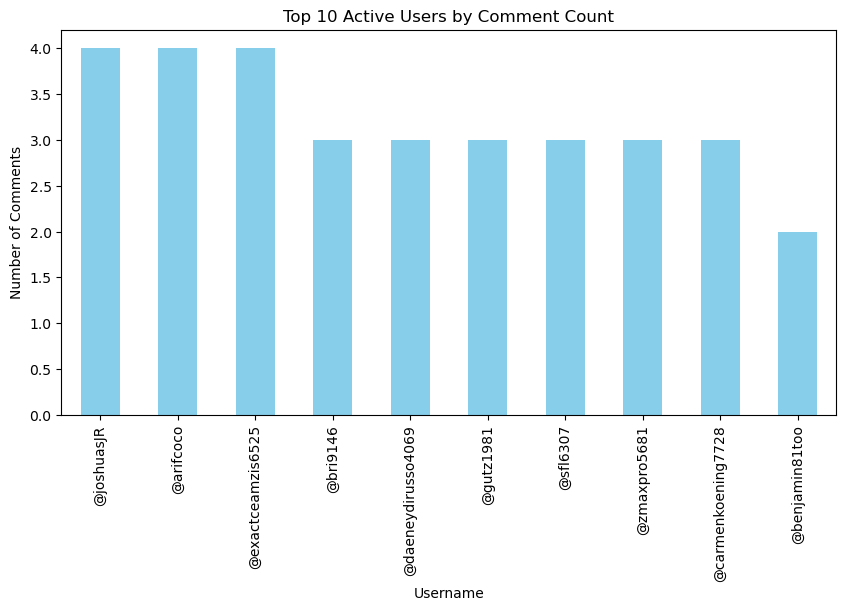

In [24]:
# Plot User Activity
plt.figure(figsize=(10,5))
user_activity.plot(kind='bar', color='skyblue')
plt.title('Top 10 Active Users by Comment Count')
plt.xlabel('Username')
plt.ylabel('Number of Comments')
plt.show()

In [25]:
# Likes Over Time Analysis
likes_over_time = data.groupby(data['date'])['like'].sum()
likes_over_time

date
2019-11-13 22:11:51.054854     7927
2020-11-12 22:11:51.054854    21210
2021-11-12 22:11:51.054854     6052
2022-11-12 22:11:51.054854     2510
2022-12-17 22:11:51.054854      508
2023-01-16 22:11:51.054854       58
2023-02-15 22:11:51.054854        6
2023-03-17 22:11:51.054854       41
2023-04-16 22:11:51.054854       36
2023-05-16 22:11:51.054854      295
2023-06-15 22:11:51.054854       11
2023-07-15 22:11:51.054854       28
2023-08-14 22:11:51.054854       26
2023-09-13 22:11:51.054854       12
2023-10-13 22:11:51.054854       22
2023-10-31 22:11:51.054854        2
2023-11-01 22:11:51.054854        0
2023-11-02 22:11:51.054854        1
2023-11-03 22:11:51.054854        0
2023-11-04 22:11:51.054854        0
2023-11-05 22:11:51.054854        2
2023-11-06 22:11:51.054854        0
2023-11-07 22:11:51.054854        1
2023-11-08 22:11:51.054854        0
2023-11-10 22:11:51.054854        0
2023-11-12 02:11:51.054854        0
2023-11-12 08:11:51.054854        0
2023-11-12 22:11:51.054

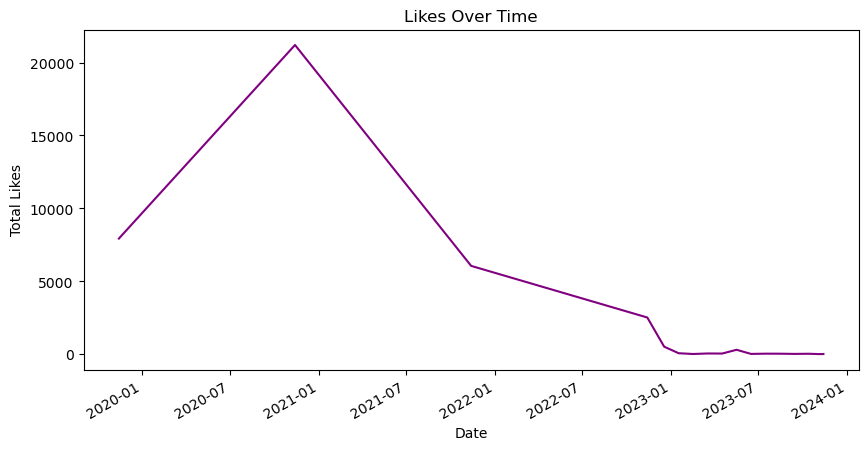

In [26]:
# Plot Likes Over Time
plt.figure(figsize=(10,5))
likes_over_time.plot(color='purple')
plt.title('Likes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.show()

In [33]:
# Remove the '@' from the username column
data['username'] = data['username'].str.replace('@', '')

In [34]:
data['comment'] = data['comment'].str.replace('[^\w\s]', '', regex=True)

In [36]:
# Save the cleaned and renamed DataFrame to a CSV file
output_file_path = r'C:\Users\Guillaume CAPELLI\Desktop\Ironhack_189\Final_Project\Data Cleaning\Scraped\cleaned_scraped_comments.csv'

# Save the cleaned and renamed DataFrame to a CSV file
data.to_csv(output_file_path, index=False, encoding='utf-8')

In [35]:
data

,username,comment,like,date
0,jackjolly789,Im not from the US but I sure as hell know not...,160,2020-11-12 22:11:51.054854
1,DenverEight,I remember in Captain Planet Matis power of he...,0,2020-11-12 22:11:51.054854
2,jhartmggc,Its tragic how this all unfolded Unfortunately...,0,2020-11-12 22:11:51.054854
3,datofficial6062,We dont need his help to understand what were ...,289,2020-11-12 22:11:51.054854
4,panthercub10,You know it odd but the more this happens the ...,1,2020-11-12 22:11:51.054854
...,...,...,...,...
2233,claudiabotto3048,Trump,0,2023-01-16 22:11:51.054854
2234,MichelSantana-xg5qi,Trump and your beautiful lie,0,2023-06-15 22:11:51.054854
2235,slifer0081,As much as I hate trump and love migrants I ha...,0,2023-09-13 22:11:51.054854
2236,george4821,Trump was the rude one here,0,2023-08-14 22:11:51.054854
